# GloVe: Global Vectors for Word Representation

# GloVe:全局词向量表示

# Abstract

# 摘要



Recent methods for learning vector space representations of words have succeeded in capturing fine-grained semantic and syntactic regularities using vector arithmetic, but the origin of these regularities has remained opaque. We analyze and make explicit the model properties needed for such regularities to emerge in word vectors. The result is a new global logbilinear regression model that combines the advantages of the two major model families in the literature: global matrix factorization and local context window methods. Our model efficiently leverages statistical information by training only on the nonzero elements in a word-word cooccurrence matrix, rather than on the entire sparse matrix or on individual context windows in a large corpus. The model produces a vector space with meaningful substructure, as evidenced by its performance of 75% on a recent word analogy task. It also outperforms related models on similarity tasks and named entity recognition.

最近学习单词的向量空间表示的方法已经成功地利用向量算法捕获了细粒度的语义和句法规律，但这些规律的起源仍然不清楚。我们分析并明确了在单词向量中出现这种规律所需的模型属性。结果是一个新的全局双线性回归模型，结合了文献中两个主要模型族的优点:全局矩阵分解和局部上下文窗口方法。我们的模型有效地利用了统计信息，只训练了一个词-词联合当前矩阵中的非零元素，而不是整个稀疏矩阵或大型语料中的单个上下文窗口。该模型产生了一个有意义子结构的向量空间，在最近的单词类比任务中表现为75%就证明了这一点。在相似度任务和命名实体识别方面也优于相关模型。

# 1 Introduction

# 1介绍



Semantic vector space models of language represent each word with a real-valued vector. These vectors can be used as features in a variety of applications, such as information retrieval (Manning et al., 2008), document classification (Sebastiani, 2002), question answering (Tellex et al., 2003), named entity recognition (Turian et al., 2010), and parsing (Socher et al., 2013).

语言的语义向量空间模型用一个实值向量表示每个单词。这些向量可以作为各种应用的特征，如信息检索(Manning et al.， 2008)、文档分类(Sebastiani, 2002)、问题回答(Tellex et al.， 2003)、命名实体识别(Turian et al.， 2010)和解析(Socher et al.， 2013)。


Most word vector methods rely on the distance or angle between pairs of word vectors as the primary method for evaluating the intrinsic quality of such a set of word representations. Recently, Mikolov et al. (2013c) introduced a new evaluation scheme based on word analogies that probes  the finer structure of the word vector space by examining not the scalar distance between word vectors, but rather their various dimensions of difference. For example, the analogy “king is to queen as man is to woman” should be encoded in the vector space by the vector equation king-queen = man-woman. This evaluation scheme favors models that produce dimensions of meaning, thereby capturing the multi-clustering idea of distributed representations (Bengio, 2009).

大多数词向量方法依赖于词向量对之间的距离或角度作为评价一组词表示的内在质量的主要方法。最近，Mikolov等人(2013c)提出了一种新的基于单词类比的评估方案，该方案不是通过检查单词向量之间的标量距离，而是通过检查它们的不同维度的差异来探测单词向量空间的精细结构。例如，“国王之于王后，如同男人之于女人”的类比，应该用向量方程king-queen = man-woman编码在向量空间中。这种评估方案有利于产生意义维度的模型，从而捕获分布式表征的多聚类思想(Bengio, 2009)。

The two main model families for learning word vectors are: 1) global matrix factorization methods, such as latent semantic analysis (LSA) (Deerwester et al., 1990) and 2) local context window methods, such as the skip-gram model of Mikolov et al. (2013c). Currently, both families suffer significant drawbacks. While methods like LSA efficiently leverage statistical information, they do relatively poorly on the word analogy task, indicating a sub-optimal vector space structure. Methods like skip-gram may do better on the analogy task, but they poorly utilize the statistics of the corpus since they train on separate local context windows instead of on global co-occurrence counts.

学习单词向量的两大类主要模型是:1)全局矩阵分解方法，如潜在语义分析(LSA) (Deerwester et al.， 1990)和2)局部上下文窗口方法，如Mikolov et al. (2013c)的skip-gram模型。目前，这两个家庭都有明显的缺陷。虽然LSA等方法充分利用了统计信息，但它们在词语类比任务上的表现相对较差，表明它们的向量空间结构不是最优的。像skip-gram这样的方法可能在类比任务上做得更好，但是它们没有很好地利用语料库的统计，因为它们是在单独的局部上下文窗口上训练，而不是在全局共出现计数上训练。

In this work, we analyze the model properties necessary to produce linear directions of meaning and argue that global log-bilinear regression models are appropriate for doing so. We propose a specific weighted least squares model that trains on global word-word co-occurrence counts and thus makes efficient use of statistics. The model produces a word vector space with meaningful substructure, as evidenced by its state-of-the-art performance of 75% accuracy on the word analogy dataset. We also demonstrate that our methods outperform other current methods on several word similarity tasks, and also on a common named entity recognition (NER) benchmark.

在这项工作中，我们分析了产生意义的线性方向所必需的模型属性，并论证了全局对数-双线性回归模型适合这样做。我们提出了一种特殊的加权最小二乘模型，该模型训练全局词-词共现计数，从而有效地利用了统计。该模型产生一个有意义的子结构的单词向量空间，在单词类比数据集上其75%的精度的最先进的性能证明了这一点。我们还证明了我们的方法在几个单词相似度任务和一个通用的命名实体识别(NER)基准测试上优于其他当前的方法。

We provide the source code for the model as well as trained word vectors at http://nlp.stanford.edu/projects/glove/.

我们提供了模型的源代码以及经过训练的单词向量在 http://nlp.stanford.edu/projects/glove/.。

# 2 Related Work

# 2相关工作



Matrix Factorization Methods. Matrix factorization methods for generating low-dimensional word representations have roots stretching as far back as LSA. These methods utilize low-rank approximations to decompose large matrices that capture statistical information about a corpus. The particular type of information captured by such matrices varies by application. In LSA, the matrices are of “term-document” type, i.e., the rows correspond to words or terms, and the columns correspond to different documents in the corpus. In contrast, the Hyperspace Analogue to Language (HAL) (Lund and Burgess, 1996), for example, utilizes matrices of “term-term” type, i.e., the rows and columns correspond to words and the entries correspond to the number of times a given word occurs in the context of another given word.

矩阵分解方法。用于生成低维字表示的矩阵分解方法的根源可以追溯到LSA。这些方法利用低秩近似来分解捕获关于语料库的统计信息的大型矩阵。此类矩阵捕获的特定类型的信息因应用程序而异。在LSA中，矩阵是“term-document”类型，行对应单词或术语，列对应语料库中的不同文档。相比之下，语言的超空间模拟(HAL) (Lund和Burgess, 1996)则利用了“词-词”类型的矩阵。行和列对应于单词，而条目对应于一个给定单词在另一个给定单词上下文中出现的次数。

A main problem with HAL and related methods is that the most frequent words contribute a disproportionate amount to the similarity measure: the number of times two words co-occur with the or and, for example, will have a large effect on their similarity despite conveying relatively little about their semantic relatedness. A number of techniques exist that addresses this shortcoming of HAL, such as the COALS method (Rohde et al., 2006), in which the co-occurrence matrix is first transformed by an entropy- or correlation-based normalization. An advantage of this type of transformation is that the raw co-occurrence counts, which for a reasonably sized corpus might span 8 or 9 orders of magnitude, are compressed so as to be distributed more evenly in a smaller interval. A variety of newer models also pursue this approach, including a study (Bullinaria and Levy, 2007) that indicates that positive pointwise mutual information (PPMI) is a good transformation. More recently, a square root type transformation in the form of Hellinger PCA (HPCA) (Lebret and Collobert, 2014) has been suggested as an effective way of learning word representations.

HAL和相关方法的一个主要问题是最常见的单词贡献不成比例的相似性测量:两个词共现的次数或与,例如,将会出现一个很大的影响他们的相似性尽管表达的语义相关度相对较少。有许多技术可以解决HAL的这一缺点，如COALS方法(Rohde et al.， 2006)，其中共现矩阵首先通过基于熵或相关的归一化进行变换。这种变换的一个优点是对原始共现计数进行压缩，使其在更小的间隔内更均匀地分布，对于规模合理的语料库，共现计数可能跨度为8或9个数量级。各种更新的模型也在采用这种方法，包括一项研究(Bullinaria和Levy, 2007)表明正点态互信息(PPMI)是一种很好的转换。最近，Hellinger PCA (HPCA)形式的平方根类型变换(Lebret和Collobert, 2014)被认为是学习单词表示的一种有效方法。

Shallow Window-Based Methods. Another approach is to learn word representations that aid in making predictions within local context windows. For example, Bengio et al. (2003) introduced a model that learns word vector representations as part of a simple neural network architecture for language modeling. Collobert and Weston (2008) decoupled the word vector training from the downstream training objectives, which paved the way for Collobert et al. (2011) to use the full context of a word for learning the word representations, rather than just the preceding context as is the case with language models.

基于浅窗口的方法。另一种方法是学习有助于在本地上下文窗口中进行预测的单词表示。例如，Bengio等人(2003)引入了一种学习单词向量表示的模型，作为语言建模的简单神经网络架构的一部分。Collobert和韦斯顿(2008)这个词解耦矢量训练从下游训练目标,铺平了道路,Collobert et al .(2011)使用一个词的上下文来学习这个词表示,而不是前面的语境与语言模型一样。


Recently, the importance of the full neural network structure for learning useful word representations has been called into question. The skip-gram and continuous bag-of-words (CBOW) models of Mikolov et al. (2013a) propose a simple single-layer architecture based on the inner product between two word vectors. Mnih and Kavukcuoglu (2013) also proposed closely-related vector log-bilinear models, vLBL and ivLBL, and Levy et al. (2014) proposed explicit word embeddings based on a PPMI metric.

最近，整个神经网络结构对于学习有用的单词表示的重要性受到了质疑。Mikolov等人(2013a)的skip-gram 和连续词袋(CBOW)模型提出了一种简单的基于两个词向量的内积的单层架构。Mnih和Kavukcuoglu(2013)也提出了密切相关的向量对数-双线性模型vLBL和ivLBL, Levy等人(2014)提出了基于PPMI度量的显式词嵌入。


In the skip-gram and ivLBL models, the objective is to predict a word’s context given the word itself, whereas the objective in the CBOW and ivLBL models is to predict a word given its context. Through evaluation on a word analogy task, these models demonstrated the capacity to learn linguistic patterns as linear relationships between the word vectors.

在skip-gram和ivLBL模型中，目标是预测给定单词本身的上下文，而CBOW和ivLBL模型中的目标是预测给定上下文的单词。通过对词语类比任务的评价，这些模型显示了将语言模式作为词语向量之间的线性关系来学习的能力。

Unlike the matrix factorization methods, the shallow window-based methods suffer from the disadvantage that they do not operate directly on the co-occurrence statistics of the corpus. Instead, these models scan context windows across the entire corpus, which fails to take advantage of the vast amount of repetition in the data.

与矩阵分解方法不同，基于浅窗口的方法不能直接对语料库的共现统计进行操作。相反，这些模型在整个语料库中扫描上下文窗口，无法利用数据中大量的重复。

# 3 The GloVe Model

# 3 GloVe模型



The statistics of word occurrences in a corpus is the primary source of information available to all unsupervised methods for learning word representations, and although many such methods now exist, the question still remains as to how meaning is generated from these statistics, and how the resulting word vectors might represent that meaning. In this section, we shed some light on this question. We use our insights to construct a new model for word representation which we call GloVe, for Global Vectors, because the global corpus statistics are captured directly by the model.

词出现在语料库的统计数据是信息的主要来源,所有非监督方法学习单词表示,尽管现在很多这样的方法存在,问题仍然是如何从这些统计数据生成意义,以及由此产生的词向量可能代表的意义。在这一节中，我们对这个问题作一些说明。我们利用我们的见解来构建一个新的词表示模型，我们称之为GloVe，因为全部语料库统计数据是直接被模型捕获的。

First we establish some notation. Let the matrix of word-word co-occurrence counts be denoted by X, whose entries Xij tabulate the number of times word j occurs in the context of word i. Let Xi = sigma(k) Xik be the number of times any word appears in the context of word i. Finally, let Pij = P(j|i) = Xij/Xi be the probability that word j appear in the context of word i.

首先，我们建立一些符号。让word-word共现矩阵的计数用X的条目Xij汇总的次数i词j词的上下文中发生。让sigma(k) Xik任何单词出现的次数的词i。最后,让Pij = P (j|i) = Xij/ Xi概率这个词出现在i的内容下。

We begin with a simple example that showcases how certain aspects of meaning can be extracted directly from co-occurrence probabilities. Consider two words i and j that exhibit a particular aspect of interest; for concreteness, suppose we are interested in the concept of thermodynamic phase, for which we might take i = ice and j = steam. The relationship of these words can be examined by studying the ratio of their co-occurrence probabilities with various probe words, k. For words k related to ice but not steam, say k = solid, we expect the ratio Pik /Pjk will be large. Similarly, for words k related to steam but not ice, say k = gas, the ratio should be small. For words k like water or fashion, that are either related to both ice and steam, or to neither, the ratio should be close to one. Table 1 shows these probabilities and their ratios for a large corpus, and the numbers confirm these expectations. Compared to the raw probabilities, the ratio is better able to distinguish relevant words (solid and gas) from irrelevant words (water and fashion) and it is also better able to discriminate between the two relevant words.

我们从一个简单的例子开始，它展示了如何直接从共现概率中提取意义的某些方面。考虑两个词i和j，它们表现出特定的兴趣;就具体而言，假设我们对热力学相的概念感兴趣，我们可以取i =ice，j =steam。这些词的关系可以通过研究它们与各种探查词k的共现概率的比率来检验。对于与ice而不是gas有关的词k，比如k = solid，我们预计Pik /Pjk的比率会很大。类似地，对于与gas有关而与ice无关的单词k，比方说k =gas，其比值应该很小。词k像“water”或“fashion”这样既与冰有关又与蒸汽无关的词，其比例应该接近于1。表1显示了大型语料库的这些概率及其比率，这些数字证实了这些预期。与原始概率相比，该比值能更好地区分相关词(solid and gas)和不相关词(water and fashion)，也能更好地区分两个相关词。

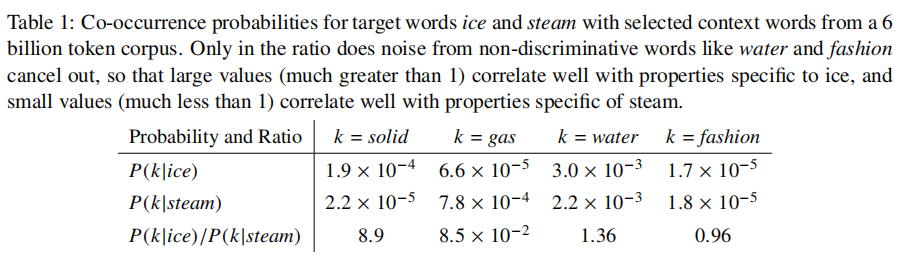

The above argument suggests that the appropriate starting point for word vector learning should be with ratios of co-occurrence probabilities rather than the probabilities themselves. Noting that the ratio Pik /Pjk depends on three words i, j, and k, the most general model takes the form, 

以上论证表明，单词向量学习的起点应该是同现概率的比值，而不是概率本身。注意到Pik /Pjk取决于三个词i、j和k，最一般的模型采用如下形式:
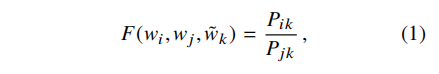

where w ∈ Rd are word vectors and ˜w ∈ Rd are separate context word vectors whose role will be discussed in Section 4.2. In this equation, the right-hand side is extracted from the corpus, and F may depend on some as-of-yet unspecified parameters. The number of possibilities for F is vast, but by enforcing a few desiderata we can select a unique choice. First, we would like F to encode the information present the ratio Pik /Pjk in the word vector space. Since vector spaces are inherently linear structures, the most natural way to do this is with vector differences. With this aim, we can restrict our consideration to those functions F that depend only on the difference of the two target words, modifying Eqn. (1) to,

词向量w∈Rd和˜w∈Rd是独立的上下文词向量的作用将在4.2节中讨论。在这个方程中，右侧从语料库中提取，F可能依赖于一些尚未指定的参数。F的可能性是巨大的，但是通过强制执行一些需求，我们可以选择一个唯一的选择。首先，我们希望F编码在单词向量空间中表示Pik /Pjk比率的信息。由于向量空间本质上是线性结构，因此最自然的方法就是使用向量差值。为了达到这个目的，我们可以将我们的考虑限制在只依赖于两个目标词的区别的函数F上，从而修改Eqn。(1),

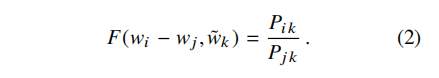

Next, we note that the arguments of F in Eqn. (2) are vectors while the right-hand side is a scalar. While F could be taken to be a complicated function parameterized by, e.g., a neural network, doing so would obfuscate the linear structure we are trying to capture. To avoid this issue, we can first take the dot product of the arguments, 

接下来，我们注意到 Eqn. (2)中F的参数是向量，而右边是标量。虽然F可以被看作是一个复杂的函数，例如神经网络参数化的函数，但这样做会使我们试图捕捉的线性结构变得模糊。为了避免这个问题，我们可以先取参数的点积，
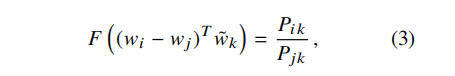

which prevents F from mixing the vector dimensions in undesirable ways. Next, note that for word-word co-occurrence matrices, the distinction between a word and a context word is arbitrary and that we are free to exchange the two roles. To do so consistently, we must not only exchange w ↔ w˜ but also X ↔ XT . Our final model should be invariant under this relabeling, but Eqn. (3) is not. However, the symmetry can be restored in two steps. First, we require that F be a homomorphism between the groups (R,+) and (R>0, ×), i.e., 

防止F以不希望的方式混合向量维数。接下来，请注意，对于单词-单词共现矩阵，单词和上下文单词之间的区别是任意的，我们可以自由地交换这两个角色。这样做,我们不仅必须交换w↔w˜还X↔XT。我们最终的模型在这个重标号下应该是不变的，但是Eqn。(3)不是。然而，这种对称性可以通过两个步骤来恢复。首先，我们要求F是组(R，+)和(R>0，×)之间的同态，即:


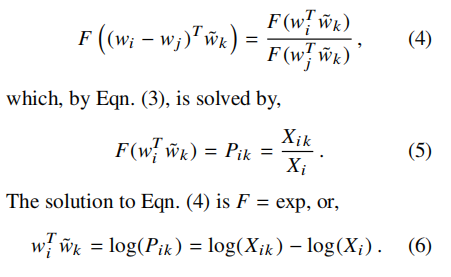

Next, we note that Eqn. (6) would exhibit the exchange symmetry if not for the log(Xi) on the right-hand side. However, this term is independent of k so it can be absorbed into a bias bi for wi . Finally, adding an additional bias b˜k for ˜wk restores the symmetry, 

接下来，我们注意到Eqn。(6)如果没有右边的log(Xi)，将显示交换对称。但是，这一项独立于k，所以它可以被吸收到偏置bi中。最后,添加一个额外的偏见b˜k˜周恢复对称,
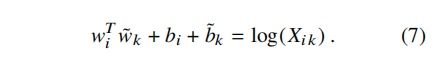

Eqn. (7) is a drastic simplification over Eqn. (1), but it is actually ill-defined since the logarithm diverges whenever its argument is zero. One resolution to this issue is to include an additive shift in the logarithm, log(Xik ) → log(1 + Xik ), which maintains the sparsity of X while avoiding the divergences. The idea of factorizing the log of the co-occurrence matrix is closely related to LSA and we will use the resulting model as a baseline in our experiments. A main drawback to this model is that it weighs all co-occurrences equally, even those that happen rarely or never. Such rare cooccurrences are noisy and carry less information than the more frequent ones — yet even just the zero entries account for 75–95% of the data in X, depending on the vocabulary size and corpus.

Eqn.(7)是对Eqn.(1)的急剧简化。但它实际上定义不明确，因为只要参数为0，对数就发散。解决这个问题的一个方法是在对数中加入一个累加移位，log(Xik)→log(1 + Xik)，这样既保持了X的稀疏性，又避免了发散。分解共现矩阵的对数的想法与LSA密切相关，我们将使用得到的模型作为我们实验的基线。该模型的一个主要缺点是，它对所有共现的情况都一视同仁，即使是那些很少发生或从不发生的情况。这种罕见的共现是嘈杂的，而且比更频繁的共现所携带的信息更少——然而，根据词汇量和语料库的大小，即使是零条目也占了X中数据的75-95%。


We propose a new weighted least squares regression model that addresses these problems.Casting Eqn. (7) as a least squares problem and introducing a weighting function f (Xij) into the cost function gives us the model
我们提出了一个新的加权最小二乘回归模型来解决这些问题。构造Eqn。(7)作为最小二乘问题，在成本函数中引入权重函数f (Xij)，给出了模型

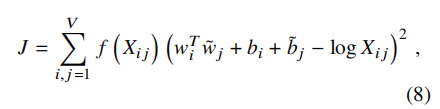

where V is the size of the vocabulary. The weighting function should obey the following properties:

其中V是词汇表的大小。权值函数应服从以下性质:



1.f (0) = 0. If f is viewed as a continuous function, it should vanish as x → 0 fast enough that the limx→0 f (x) log2 x is finite.

1.f(0) = 0。如果把f看成是一个连续函数，当x→0时，它应该消失得足够快，使极限x→0时f (x) log2x是有限的。



2.f (x) should be non-decreasing so that rare co-occurrences are not overweighted.

2.f (x)应该是非递减的，这样罕见的共现不会过度。



3.f (x) should be relatively small for large values of x, so that frequent co-occurrences are not overweighted.

3.对于较大的x值，f (x)应该相对较小，以便频繁的共同出现不会过度加权。


Of course a large number of functions satisfy these properties, but one class of functions that we found to work well can be parameterized as,

当然，很多函数都满足这些性质，但有一类函数我们发现可以用参数化，

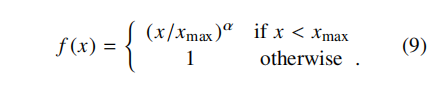

The performance of the model depends weakly on the cutoff, which we fix to xmax = 100 for all our experiments. We found that α = 3/4 gives a modest improvement over a linear version with α = 1. Although we offer only empirical motivation for choosing the value 3/4, it is interesting that a similar fractional power scaling was found to give the best performance in (Mikolov et al., 2013a).

模型的性能很弱地依赖于截止，在我们所有的实验中，我们都将截止固定在xmax = 100。我们发现，与线性版本相比，3/4提供了适度的改进。虽然我们仅提供了选择3/4值的经验动机，但有趣的是，我们发现类似的分数权力尺度在(Mikolov et al.， 2013a)中表现最佳。

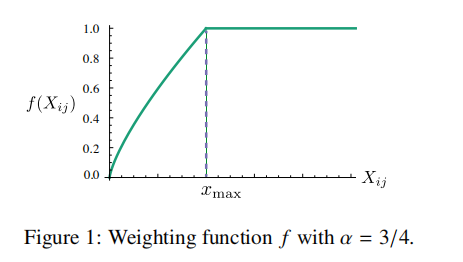

## 3.1 Relationship to Other Models

## 3.1与其他模型的关系

Because all unsupervised methods for learning word vectors are ultimately based on the occurrence statistics of a corpus, there should be commonalities between the models. Nevertheless, certain models remain somewhat opaque in this regard, particularly the recent window-based methods like skip-gram and ivLBL. Therefore, in this subsection we show how these models are related to our proposed model, as defined in Eqn. (8).

由于所有学习词向量的无监督方法最终都是基于语料库的发生统计，因此模型之间应该存在共性。然而，某些模型在这方面仍然有些不透明，特别是最近的基于窗口的方法，如skip-gram和ivLBL。因此，在本小节中，我们将展示这些模型如何与我们在Eqn.(8)中定义的提出的模型相关联。


The starting point for the skip-gram or ivLBL methods is a model Qij for the probability that word j appears in the context of word i. For concreteness, let us assume that Qij is a softmax,

skip-gram或ivLBL方法的出发点是一个模型Qij，表示单词j在单词i的上下文中出现的概率。对于具体性，我们假设Qij是一个softmax，

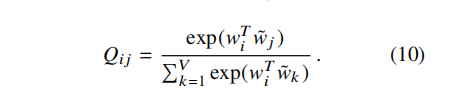

Most of the details of these models are irrelevant for our purposes, aside from the the fact that they attempt to maximize the log probability as a context window scans over the corpus. Training proceeds in an on-line, stochastic fashion, but the implied global objective function can be written as,

这些模型的大部分细节与我们的目的无关，除了它们试图最大化上下文窗口扫描语料库时的日志概率之外。训练以在线的、随机的方式进行，但隐含的全局目标函数可以写成:

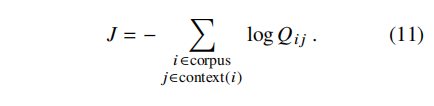

Evaluating the normalization factor of the softmax for each term in this sum is costly. To allow for efficient training, the skip-gram and ivLBL models introduce approximations to Qi j. However, the sum in Eqn. (11) can be evaluated much more efficiently if we first group together those terms that have the same values for i and j,

评估这个总和中每一项的softmax的归一化因子是昂贵的。为了实现有效的训练，skip-gram和ivLBL模型引入了Qij的近似。然而，Eqn.(11)中的和的计算效率更高，如果我们先把i和j值相同的项聚在一起，

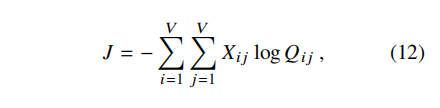

where we have used the fact that the number of like terms is given by the co-occurrence matrix X.

这里我们使用了类似项的数量由共现矩阵X给出。



Recalling our notation for Xi = sigmak Xik and Pij = Xij/Xi , we can rewrite J as, 

回顾一下Xi = sigmak Xik和Pij = Xi J /Xi的符号，我们可以把J写成，

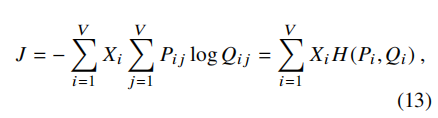

where H(Pi,Qi) is the cross entropy of the distributions Pi and Qi , which we define in analogy to Xi . As a weighted sum of cross-entropy error, this objective bears some formal resemblance to the weighted least squares objective of Eqn. (8). In fact, it is possible to optimize Eqn. (13) directly as opposed to the on-line training methods used in the skip-gram and ivLBL models. One could interpret this objective as a “global skip-gram” model, and it might be interesting to investigate further. On the other hand, Eqn. (13) exhibits a number of undesirable properties that ought to be addressed before adopting it as a model for learning word vectors.

其中H(Pi,Qi)是Pi和Qi分布的交叉熵，我们将其定义为Xi。作为交叉熵误差的加权和，该目标与Eqn.(8)的加权最小二乘目标有某种形式上的相似性。事实上，优化Eqn.(13)是可能的。与skip-gram和ivLBL模型中使用的在线训练方法相反。人们可以将这一目标解释为“global skip-gram”模型，进一步研究可能会很有趣。另一方面，Eqn.(13)显示了许多在采用它作为学习单词向量的模型之前应该解决的不良属性。



To begin, cross entropy error is just one among many possible distance measures between probability distributions, and it has the unfortunate property that distributions with long tails are often modeled poorly with too much weight given to the unlikely events. Furthermore, for the measure to be bounded it requires that the model distribution Q be properly normalized. This presents a computational bottleneck owing to the sum over the whole vocabulary in Eqn. (10), and it would be desirable to consider a different distance measure that did not require this property of Q. A natural choice would be a least squares objective in which normalization factors in Q and P are discarded, 

首先，交叉熵误差只是概率分布之间许多可能的距离度量之一，而且它有一个不幸的属性，即长尾分布的建模常常很差，对不太可能发生的事件给予了太多的权重。此外，要使测度有界，需要对模型分布Q进行适当的归一化。由于Eqn.(10)中整个词汇表的总和，这造成了计算瓶颈。考虑一种不同的距离度量，它不需要Q的这一特性。一个自然的选择是一个最小二乘目标，其中Q和P的归一化因子被丢弃，

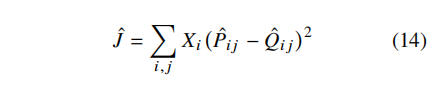

where Pˆ ij = Xij and Qˆij = exp(wTi w˜j) are the unnormalized distributions. At this stage another problem emerges, namely that Xij often takes very large values, which can complicate the optimization. An effective remedy is to minimize the squared error of the logarithms of Pˆ and Qˆ instead,

Pˆij = Xij和Qˆij = exp (wTi w˜j)的非规范分布。在这个阶段出现了另一个问题，即Xij通常取非常大的值，这会使优化复杂化。平方误差最小化的有效补救措施是P的对数ˆ和Qˆ相反,

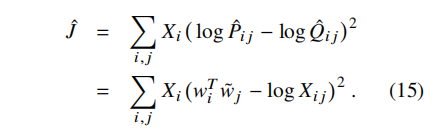

Finally, we observe that while the weighting factor Xi is preordained by the on-line training method inherent to the skip-gram and ivLBL models, it is by no means guaranteed to be optimal. In fact, Mikolov et al. (2013a) observe that performance can be increased by filtering the data so as to reduce the effective value of the weighting factor for frequent words. With this in mind, we introduce a more general weighting function, which we are free to take to depend on the context word as well. The result is, 

最后，我们观察到，虽然在skip-gram和ivLBL模型固有的在线训练方法中预先设定了权重因子Xi，但它并不能保证是最优的。事实上，Mikolov等人(2013a)观察到可以通过过滤数据来降低频繁词的权重因子的有效值来提高性能。考虑到这一点，我们引入了一个更一般的权重函数，我们也可以根据上下文单词自由地使用它。其结果是,

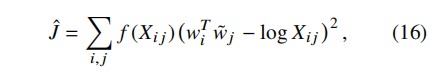

which is equivalent1 to the cost function of Eqn. (8), which we derived previously.

它等于Eqn.(8)的代价函数。是我们之前推导出来的。

## 3.2 Complexity of the model

## 3.2模型的复杂性



As can be seen from Eqn. (8) and the explicit form of the weighting function f (X), the computational complexity of the model depends on the number of nonzero elements in the matrix X. As this number is always less than the total number of entries of the matrix, the model scales no worse than O(|V|^2). At first glance this might seem like a substantial improvement over the shallow windowbased approaches, which scale with the corpus size, |C|. However, typical vocabularies have hundreds of thousands of words, so that |V|^2 can be in the hundreds of billions, which is actually much larger than most corpora. For this reason it is important to determine whether a tighter bound can be placed on the number of nonzero elements of X.

从Eqn.(8)和显式形式的权重函数f(X)可以看出。,模型的计算复杂度取决于数量的矩阵中的非零元素X这个数字永远小于矩阵的条目的总数,模型尺度没有比O(|V|^2)。乍一看，这似乎是对基于浅窗口的方法的重大改进，后者可随语料库大小|C|伸缩。然而，典型的词汇表有数十万个单词，所以|V|^2 可以达到数千亿，这实际上比大多数语料都要大得多。由于这个原因，确定X的非零元素的数目是否可以被设置一个更紧密的界限是很重要的。



In order to make any concrete statements about the number of nonzero elements in X, it is necessary to make some assumptions about the distribution of word co-occurrences. In particular, we will assume that the number of co-occurrences of word i with word j, Xi j, can be modeled as a power-law function of the frequency rank of that word pair, rij:

为了对X中非零元素的数量做出任何具体的陈述，有必要对单词共现的分布做一些假设。特别地，我们假设单词i与单词j共出现的次数Xi j可以建模为该词对rij频率秩的幂律函数:

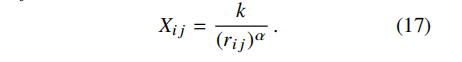

The total number of words in the corpus is proportional to the sum over all elements of the cooccurrence matrix X, 

语料库中的单词总数与共现矩阵X中所有元素的总和成正比，

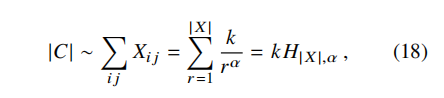

where we have rewritten the last sum in terms of the generalized harmonic number Hn,m. The upper limit of the sum, |X|, is the maximum frequency rank, which coincides with the number of nonzero elements in the matrix X. This number is also equal to the maximum value of r in Eqn. (17) such that Xij ≥ 1, i.e., |X| = k1/α. Therefore we can write Eqn. (18) as,

我们重写了最后一个和用广义调和数Hn，m表示。和的上限值|X|为最大频率秩，与矩阵X中非零元素的个数一致，该数也等于Eqn. (17)中r的最大值。使Xij≥1，即， |X| = k^1/s。所以我们可以写成Eqn.(18),

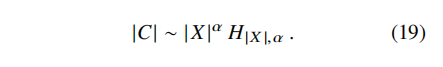

We are interested in how |X| is related to |C| when both numbers are large; therefore we are free to expand the right hand side of the equation for large |X|. For this purpose we use the expansion of generalized harmonic numbers (Apostol, 1976), 

我们感兴趣的是当两个数都很大时|X|和|C|是如何相关的;因此我们可以自由地展开方程的右边对于大的|x|。为此，我们使用广义调和数的展开(Apostol, 1976)，

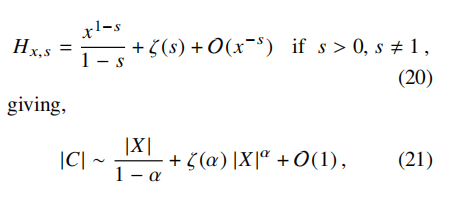

where ζ (s) is the Riemann zeta function. In the limit that X is large, only one of the two terms on the right hand side of Eqn. (21) will be relevant, and which term that is depends on whether α > 1,

其中，(s)是黎曼齐塔函数。当X很大时，Eqn右边的两项中只有一项。(21)将是相关的，是哪个术语取决于是否排除> 1，

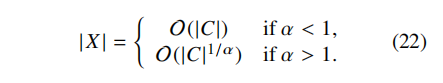

For the corpora studied in this article, we observe that Xi j is well-modeled by Eqn. (17) with α = 1.25. In this case we have that |X| = O(|C|0.8 ). Therefore we conclude that the complexity of the model is much better than the worst case O(V2 ), and in fact it does somewhat better than the on-line window-based methods which scale like O(|C|).

对于本文所研究的语料库，我们发现Eqn.(17)很好地模拟了Xij，帧距= 1.25。在这个例子中，我们得到|x| = O(|C|0。8)因此，我们得出的结论是，该模型的复杂性比最坏情况O(V2)好得多，事实上，它比基于窗口的在线方法(如O(|C|))要好一些。


# 4 Experiments

# 4实验



## 4.1 Evaluation methods

## 4.1评价方法



We conduct experiments on the word analogy task of Mikolov et al. (2013a), a variety of word similarity tasks, as described in (Luong et al., 2013), and on the CoNLL-2003 shared benchmark dataset for NER (Tjong Kim Sang and De Meulder, 2003).

我们对Mikolov等人(2013a)的单词类比任务、(Luong等人，2013)中描述的各种单词相似性任务以及NER的CoNLL-2003共享基准数据集(Tjong Kim Sang和De Meulder, 2003)进行了实验。

Word analogies. The word analogy task consists of questions like, “a is to b as c is to ?” The dataset contains 19,544 such questions, divided into a semantic subset and a syntactic subset. The semantic questions are typically analogies about people or places, like “Athens is to Greece as Berlin is to ?”. The syntactic questions are typically analogies about verb tenses or forms of adjectives, for example “dance is to dancing as fly is to ?”. To correctly answer the question, the model should uniquely identify the missing term, with only an exact correspondence counted as a correct match. We answer the question “a is to b as c is to ?” by finding the word d whose representation wd is closest to wb b wa + wc according to the cosine similarity.

词的类比。单词类比任务由这样的问题组成，“a与b的关系就像c与b的关系一样?”数据集包含19,544个这样的问题，它们被划分为语义子集和语法子集。语义问题通常是关于人或地方的类比，比如“雅典之于希腊，如同柏林之于?”句法问题通常是关于动词时态或形容词形式的类比，例如“dance is to dancing as fly is to ?”为了正确地回答这个问题，模型应该唯一地识别缺失的术语，只有精确的对应才算正确的匹配。我们通过根据余弦相似度找到表示wd最接近wb-wa+wc的单词d来回答“a是b，正如c是?”

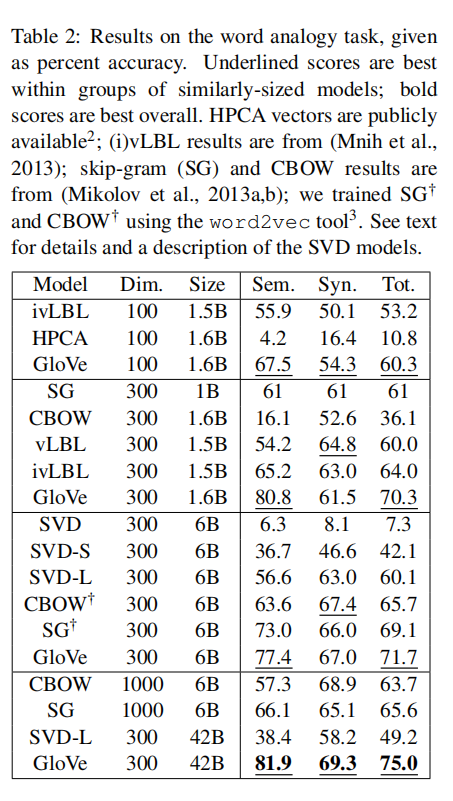

Word similarity. While the analogy task is our primary focus since it tests for interesting vector space substructures, we also evaluate our model on a variety of word similarity tasks in Table 3. These include WordSim-353 (Finkelstein et al., 2001), MC (Miller and Charles, 1991), RG (Rubenstein and Goodenough, 1965), SCWS (Huang et al., 2012), and RW (Luong et al., 2013).

词相似。虽然类比任务是我们的主要关注点，因为它测试感兴趣的向量空间子结构，但我们也在表3中的各种单词相似性任务上评估我们的模型。其中包括WordSim-353 (Finkelstein et al.， 2001)、MC (Miller and Charles, 1991)、RG (Rubenstein and Goodenough, 1965)、SCWS (Huang et al.， 2012)和RW (Luong et al.， 2013)。

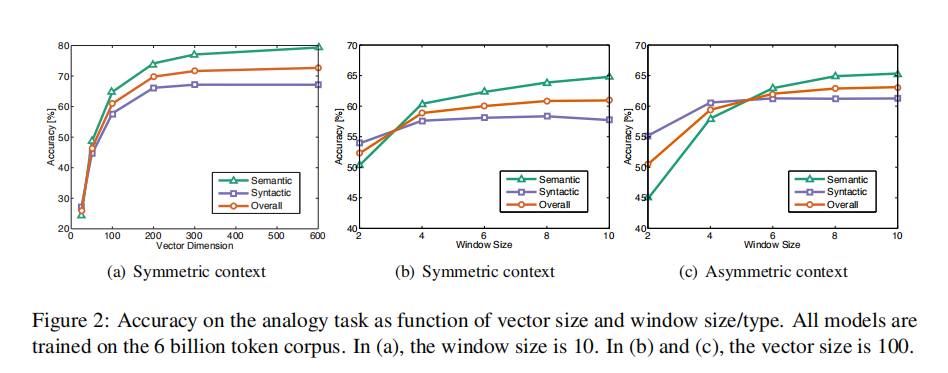

Named entity recognition. The CoNLL-2003 English benchmark dataset for NER is a collection of documents from Reuters newswire articles, annotated with four entity types: person, location, organization, and miscellaneous. We train models on CoNLL-03 training data on test on three datasets: 1) ConLL-03 testing data, 2) ACE Phase 2 (2001-02) and ACE-2003 data, and 3) MUC7 Formal Run test set. We adopt the BIO2 annotation standard, as well as all the preprocessing steps described in (Wang and Manning, 2013). We use a comprehensive set of discrete features that comes with the standard distribution of the Stanford NER model (Finkel et al., 2005). A total of 437,905 discrete features were generated for the CoNLL-2003 training dataset. In addition, 50-dimensional vectors for each word of a five-word context are added and used as continuous features. With these features as input, we trained a conditional random field (CRF) with exactly the same setup as the CRFjoin model of (Wang and Manning, 2013).

命名实体识别。CoNLL-2003 英文NER基准数据集是路透社文章的文档集合，注释有四种实体类型:person、location、organization和miscellaneous。我们在三个数据集上对 CoNLL-03训练数据进行测试训练模型:1) CoNLL-03测试数据，2)ACE Phase 2(2001-02)和ACE-2003数据，3)MUC7正式运行测试集。我们采用BIO2标注标准，以及(Wang and Manning, 2013)中所述的所有预处理步骤。我们使用了斯坦福NER模型标准分布所附带的一套全面的离散特征(Finkel et al.， 2005)。总共生成了437,905个离散特征为con -2003训练数据集。此外，为五个单词上下文中的每个单词添加50维向量，并用作连续特征。将这些特征作为输入，我们训练了条件随机场(CRF)，其设置与(Wang and Manning, 2013)的CRFjoin模型完全相同。

## 4.2 Corpora and training details

## 4.2语料库和训练细节



We trained our model on five corpora of varying sizes: a 2010 Wikipedia dump with 1 billion tokens; a 2014 Wikipedia dump with 1.6 billion tokens; Gigaword 5 which has 4.3 billion tokens; the combination Gigaword5 + Wikipedia2014, which has 6 billion tokens; and on 42 billion tokens of web data, from Common Crawl5 . We tokenize and lowercase each corpus with the Stanford tokenizer, build a vocabulary of the 400,000 most frequent words6 , and then construct a matrix of cooccurrence counts X. In constructing X, we must choose how large the context window should be and whether to distinguish left context from right context. We explore the effect of these choices below. In all cases we use a decreasing weighting function, so that word pairs that are d words apart contribute 1/d to the total count. This is one way to account for the fact that very distant word pairs are expected to contain less relevant information about the words’ relationship to one another.

我们在5个不同大小的语料库上训练我们的模型:一个2010年维基百科的垃圾堆，里面有10亿代币;2014年维基百科转储了16亿代币;拥有43亿代币的Gigaword 5;Gigaword5 + Wikipedia2014，拥有60亿个代币;以及420亿份来自普通爬虫的令牌网络数据。我们标记和小写与斯坦福记号赋予器每个语料库,构建一个词汇的400000个最频繁的words6,然后构造一个矩阵的共存计数X构造X,我们必须选择多大的上下文窗口应该和是否区分上下文从右上下文。我们将在下面探讨这些选择的影响。在所有情况下，我们使用一个递减的权重函数，这样分开的d个单词对占总数的1/d。这是解释一个事实的一种方式，即非常遥远的词对被期望包含较少的相关信息的单词之间的关系。



For all our experiments, we set xmax = 100, α = 3/4, and train the model using AdaGrad (Duchi et al., 2011), stochastically sampling nonzero elements from X, with initial learning rate of 0.05. We run 50 iterations for vectors smaller than 300 dimensions, and 100 iterations otherwise (see Section 4.6 for more details about the convergence rate). Unless otherwise noted, we use a context of ten words to the left and ten words to the right.

在我们所有的实验中，我们设xmax = 100，(= 3/4)，使用AdaGrad (Duchi et al.， 2011)对模型进行训练，随机从X中抽取非零元素，初始学习率为0.05。对于小于300维的向量，我们运行50次迭代，其他情况下运行100次迭代(关于收敛速度的更多细节，请参见4.6节)。除非另有说明，我们使用的上下文中左边十个词，右边十个词。



The model generates two sets of word vectors, W and W˜ . When X is symmetric, W and W˜ are equivalent and differ only as a result of their random initializations; the two sets of vectors should perform equivalently. On the other hand, there is evidence that for certain types of neural networks, training multiple instances of the network and then combining the results can help reduce overfitting and noise and generally improve results (Ciresan et al., 2012). With this in mind, we choose to use the sum W +W˜ as our word vectors. Doing so typically gives a small boost in performance, with the biggest increase in the semantic analogy task.

该模型生成两组词向量,W和W˜。当X是对称的,W和W˜是等价的,不同的只是由于他们的随机初始化;这两组向量应该是相等的。另一方面，有证据表明，对于某些类型的神经网络，训练多个网络实例，然后将结果结合起来，有助于减少过拟合和噪声，总体上提高结果(Ciresan et al.， 2012)。有鉴于此,我们选择使用W + W˜词向量。这样做通常会略微提高性能，而语义类比任务的增幅最大。



We compare with the published results of a variety of state-of-the-art models, as well as with our own results produced using the word2vec tool and with several baselines using SVDs. With word2vec, we train the skip-gram (SG† ) and continuous bag-of-words (CBOW† ) models on the 6 billion token corpus (Wikipedia 2014 + Gigaword 5) with a vocabulary of the top 400,000 most frequent words and a context window size of 10. We used 10 negative samples, which we show in Section 4.6 to be a good choice for this corpus.

我们比较了各种最新模型发布的结果，以及我们自己使用word2vec工具和使用SVDs的几个基线生成的结果。使用word2vec，我们在60亿个标记语料库(Wikipedia 2014 + Gigaword 5)上训练了跃格(SG†)和连续词包(CBOW†)模型，其中包含40万个最常见的词汇，上下文窗口大小为10。我们使用了10个阴性样本，我们在4.6节中表明这是一个很好的选择。



For the SVD baselines, we generate a truncated matrix Xtrunc which retains the information of how frequently each word occurs with only the top 10,000 most frequent words. This step is typical of many matrix-factorization-based methods as the extra columns can contribute a disproportionate number of zero entries and the methods are otherwise computationally expensive.

对于SVD基线，我们生成一个截断的矩阵Xtrunc，它保留每个单词出现频率的信息，只包含前10000个最常见的单词。这个步骤是许多基于矩阵因子分解的方法的典型，因为额外的列可能造成不成比例的零条目数，并且这些方法在计算上很昂贵。



The singular vectors of this matrix constitute the baseline “SVD”. We also evaluate two related baselines: “SVD-S” in which we take the SVD of

该矩阵的奇异向量构成基线“SVD”。我们也评估了两个相关的基线:“SVD- s”，其中我们取的SVD



√Xtrunc, and “SVD-L” in which we take the SVD of log(1+Xtrunc). Both methods help compress the otherwise large range of values in X.

√Xtrunc和SVD- l，其中取log(1+Xtrunc)的SVD。这两种方法都有助于压缩X中较大范围的值。


## 4.3 Results

## 4.3结果



We present results on the word analogy task in Table 2. The GloVe model performs significantly better than the other baselines, often with smaller vector sizes and smaller corpora. Our results using the word2vec tool are somewhat better than most of the previously published results. This is due to a number of factors, including our choice to use negative sampling (which typically works better than the hierarchical softmax), the number of negative samples, and the choice of the corpus.

我们在表2中给出了单词类比任务的结果。手套模型的性能明显优于其他基线，通常具有较小的向量大小和较小的语体。我们使用word2vec工具得到的结果比以前发布的大多数结果要好一些。这是由许多因素造成的，包括我们选择使用负抽样(它通常比分级的softmax更好)、负抽样的数量和语料库的选择。

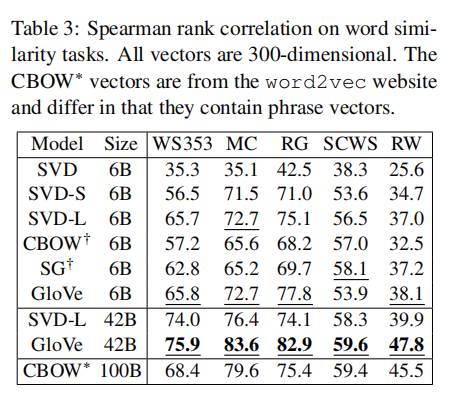

We demonstrate that the model can easily be trained on a large 42 billion token corpus, with a substantial corresponding performance boost. We note that increasing the corpus size does not guarantee improved results for other models, as can be seen by the decreased performance of the SVD-L model on this larger corpus. The fact that this basic SVD model does not scale well to large corpora lends further evidence to the necessity of the type of weighting scheme proposed in our model.

我们证明，该模型可以很容易地在420亿个令牌语料库上进行训练，并有显著的性能提升。我们注意到，增加语料库大小并不能保证其他模型的性能得到改善，这一点可以从更大语料库上的SVD-L模型的性能下降中看出。这个基本的奇异值分解模型并不能很好地适应大型语料库，这进一步证明了模型中提出的加权方案的必要性。



Table 3 shows results on five different word similarity datasets. A similarity score is obtained from the word vectors by first normalizing each feature across the vocabulary and then calculating the cosine similarity. We compute Spearman’s rank correlation coefficient between this score and the human judgments. CBOW∗ denotes the vectors available on the word2vec website that are trained with word and phrase vectors on 100B words of news data. GloVe outperforms it while using a corpus less than half the size.

表3显示了五个不同单词相似度数据集的结果。首先对词汇表中的每个特征进行归一化，然后计算余弦相似度，从而得到单词向量的相似度评分。我们计算这个分数与人类判断之间的斯皮尔曼等级相关系数。CBOW∗表示word2vec网站上可用的向量，它使用新闻数据中100B个单词上的单词和短语向量进行训练。当使用不到一半大小的语料库时，手套的性能优于它。



Table 4 shows results on the NER task with the CRF-based model. The L-BFGS training terminates when no improvement has been achieved on the dev set for 25 iterations. Otherwise all configurations are identical to those used by Wang and Manning (2013). The model labeled Discrete is the baseline using a comprehensive set of discrete features that comes with the standard distribution of the Stanford NER model, but with no word vector features. In addition to the HPCA and SVD models discussed previously, we also compare to the models of Huang et al. (2012) (HSMN) and Collobert and Weston (2008) (CW). We trained the CBOW model using the word2vec tool8. The GloVe model outperforms all other methods on all evaluation metrics, except for the CoNLL test set, on which the HPCA method does slightly better. We conclude that the GloVe vectors are useful in downstream NLP tasks, as was first shown for neural vectors in (Turian et al., 2010).

表4显示了使用基于crf模型的NER任务的结果。当开发集在25次迭代中没有取得任何改进时，L-BFGS培训终止。否则，所有配置都与Wang和Manning(2013)使用的相同。标记为离散的模型是使用一套完整的离散特征的基线，这些特征来自斯坦福NER模型的标准分布，但是没有单词向量特征。除了前面讨论的HPCA和SVD模型，我们还将其与Huang等人(2012)(HSMN)和Collobert和Weston (2008) (CW)的模型进行了比较。我们使用word2vec工具8训练CBOW模型。手套模型在所有评价指标上都优于其他所有方法，除了CoNLL测试集，HPCA方法在CoNLL测试集上稍好一些。我们的结论是，手套向量在下游NLP任务中是有用的，正如神经向量在(Turian et al.， 2010)中首次显示的那样。

## 4.4 Model Analysis: Vector Length and Context Size

## 4.4 模型分析:向量长度和上下文大小

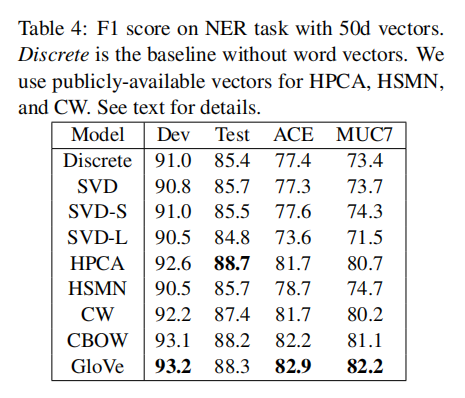

In Fig. 2, we show the results of experiments that vary vector length and context window. A context window that extends to the left and right of a target word will be called symmetric, and one which extends only to the left will be called asymmetric. In (a), we observe diminishing returns for vectors larger than about 200 dimensions. In (b) and (c), we examine the effect of varying the window size for symmetric and asymmetric context windows. Performance is better on the syntactic subtask for small and asymmetric context windows, which aligns with the intuition that syntactic information is mostly drawn from the immediate context and can depend strongly on word order. Semantic information, on the other hand, is more frequently non-local, and more of it is captured with larger window sizes.

在图2中，我们展示了改变矢量长度和上下文窗口的实验结果。扩展到目标词的左右两边的上下文窗口称为对称的，只扩展到左边的上下文窗口称为不对称的。在(a)中，我们观察到大于200维的向量的收益递减。在(b)和(c)中，我们研究了改变窗口大小对对称和非对称上下文窗口的影响。对于较小且不对称的上下文窗口，在句法子任务上的性能更好，这与句法信息大多来自于直接上下文、对词序的依赖性强的直觉是一致的。另一方面，语义信息更多地是非本地的，而且更多的语义信息是通过更大的窗口大小捕获的。


## 4.5 Model Analysis: Corpus Size

## 4.5模型分析:语料库大小

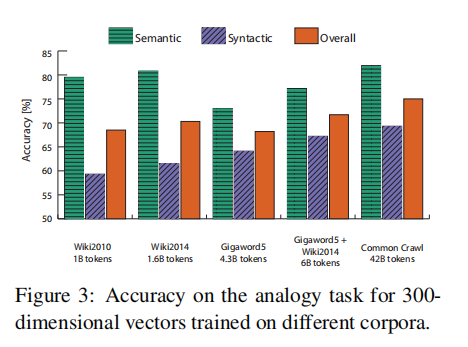

In Fig. 3, we show performance on the word analogy task for 300-dimensional vectors trained on different corpora. On the syntactic subtask, there is a monotonic increase in performance as the corpus size increases. This is to be expected since larger corpora typically produce better statistics. Interestingly, the same trend is not true for the semantic subtask, where the models trained on the smaller Wikipedia corpora do better than those trained on the larger Gigaword corpus. This is likely due to the large number of city- and countrybased analogies in the analogy dataset and the fact that Wikipedia has fairly comprehensive articles for most such locations. Moreover, Wikipedia’s entries are updated to assimilate new knowledge, whereas Gigaword is a fixed news repository with outdated and possibly incorrect information.

在图3中，我们展示了在不同语料库上训练的300维向量进行单词类比任务的性能。在句法子任务上，随着语料库大小的增加，表现呈单调递增。这是可以预料的，因为较大的语料库通常产生更好的统计数据。有趣的是，同样的趋势在语义子任务中并不成立，在较小的Wikipedia语料库中训练的模型比在较大的Gigaword语料库中训练的模型表现更好。这可能是由于类比数据集中有大量基于城市和国家的类比，而且维基百科对大多数此类地点都有相当全面的文章。此外，维基百科的词条会更新以吸收新知识，而Gigaword只是一个固定的新闻知识库，里面有过时的、甚至可能是错误的信息。

## 4.6 Model Analysis: Run-time

## 4.6 模型分析:运行时间



The total run-time is split between populating X and training the model. The former depends on many factors, including window size, vocabulary size, and corpus size. Though we did not do so, this step could easily be parallelized across multiple machines (see, e.g., Lebret and Collobert (2014) for some benchmarks). Using a single thread of a dual 2.1GHz Intel Xeon E5-2658 machine, populating X with a 10 word symmetric context window, a 400,000 word vocabulary, and a 6 billion token corpus takes about 85 minutes. Given X, the time it takes to train the model depends on the vector size and the number of iterations. For 300-dimensional vectors with the above settings (and using all 32 cores of the above machine), a single iteration takes 14 minutes. See Fig. 4 for a plot of the learning curve.

总运行时间在填充X和训练模型之间进行分割。前者取决于许多因素，包括窗口大小、词汇表大小和语料库大小。虽然我们没有这样做，但这一步可以很容易地在多台机器上并行(参见Lebret和Collobert(2014)的一些基准测试)。使用双2.1GHz Intel Xeon E5-2658机器的单个线程，用10个单词对称上下文窗口、40万个单词词汇表和60亿个词语料填充X大约需要85分钟。给定X，用于训练模型的时间取决于向量的大小和迭代次数。对于具有上述设置的300维向量(并使用上述机器的所有32个核)，一次迭代需要14分钟。学习曲线如图4所示。

## 4.7 Model Analysis: Comparison with word2vec

## 4.7模型分析:与word2vec比较



A rigorous quantitative comparison of GloVe with word2vec is complicated by the existence of many parameters that have a strong effect on performance. We control for the main sources of variation that we identified in Sections 4.4 and 4.5 by setting the vector length, context window size, corpus, and vocabulary size to the configuration mentioned in the previous subsection.

由于存在许多对性能有很大影响的参数，使得GloVe与word2vec进行严格的定量比较变得复杂。通过将向量长度、上下文窗口大小、语料库和词汇表大小设置为前面小节中提到的配置，我们控制了在4.4和4.5节中确定的主要变异源。



The most important remaining variable to control for is training time. For GloVe, the relevant parameter is the number of training iterations. For word2vec, the obvious choice would be the number of training epochs. Unfortunately, the code is currently designed for only a single epoch: it specifies a learning schedule specific to a single pass through the data, making a modification for multiple passes a non-trivial task. Another choice is to vary the number of negative samples. Adding negative samples effectively increases the number of training words seen by the model, so in some ways it is analogous to extra epochs.

剩下的最重要的变量是训练时间。对于GloVe，相关参数为训练迭代次数。对于word2vec，明显的选择是训练epoch的数量。不幸的是，该代码目前仅为单轮设计:它指定了一个特定于一次数据传递的学习时间表，使多次传递的修改成为一项不简单的任务。另一种选择是改变负样本的数量。增加负样本有效地增加了模型看到的训练词的数量，因此在某些方面它类似于额外的epoch。



We set any unspecified parameters to their default values, assuming that they are close to optimal, though we acknowledge that this simplification should be relaxed in a more thorough analysis.

我们将任何未指定的参数设置为默认值，假设它们接近最佳值，尽管我们承认，在更彻底的分析中应该放松这种简化。

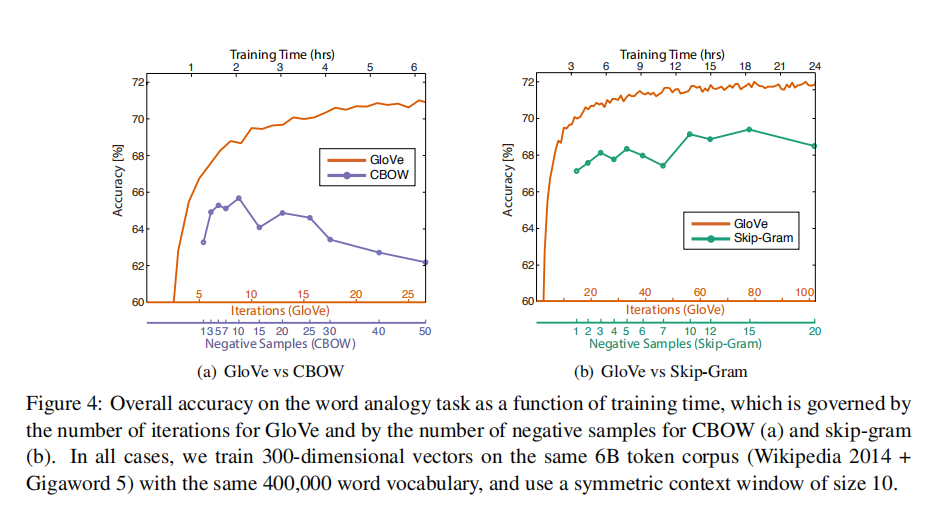

In Fig. 4, we plot the overall performance on the analogy task as a function of training time. The two x-axes at the bottom indicate the corresponding number of training iterations for GloVe and negative samples for word2vec. We note that word2vec’s performance actually decreases if the number of negative samples increases beyond about 10. Presumably this is because the negative sampling method does not approximate the target probability distribution well.

在图4中，我们将模拟任务的总体性能绘制成训练时间的函数。底部的两个x轴表示对应的GloVe和word2vec的负采样的训练迭代次数。我们注意到，如果负样本的数量超过10个，word2vec的性能实际上会下降。这可能是因为负抽样方法不能很好地近似目标概率分布。



For the same corpus, vocabulary, window size, and training time, GloVe consistently outperforms word2vec. It achieves better results faster, and also obtains the best results irrespective of speed.

对于相同的语料库、词汇表、窗口大小和训练时间，GloVe始终优于word2vec。它能更快地得到更好的结果，也能在不考虑速度的情况下得到最好的结果。

# 5 Conclusion

# 5 结论



Recently, considerable attention has been focused on the question of whether distributional word representations are best learned from count-based methods or from prediction-based methods. Currently, prediction-based models garner substantial support; for example, Baroni et al. (2014) argue that these models perform better across a range of tasks. In this work we argue that the two classes of methods are not dramatically different at a fundamental level since they both probe the underlying co-occurrence statistics of the corpus, but the efficiency with which the count-based methods capture global statistics can be advantageous. We construct a model that utilizes this main benefit of count data while simultaneously capturing the meaningful linear substructures prevalent in recent log-bilinear prediction-based methods like word2vec. The result, GloVe, is a new global log-bilinear regression model for the unsupervised learning of word representations that outperforms other models on word analogy, word similarity, and named entity recognition tasks.

最近，相当多的注意力集中在这样一个问题上:分布式词表示是最好地从基于计数的方法学习还是从基于预测的方法学习。目前，基于预测的模型获得了大量支持;例如，Baroni等人(2014)认为这些模型在一系列任务中表现得更好。在本研究中，我们认为这两类方法在基本层面上没有显著差异，因为它们都探究了语料库的潜在共发生统计，但基于计数的方法捕获全局统计的效率可能是有利的。我们构建了一个模型，利用计数数据的这种主要好处，同时捕获最近基于对数双线性预测的方法(如word2vec)中普遍存在的有意义的线性子结构。该模型在词语类比、词语相似度和命名实体识别任务方面优于其他模型。



# Acknowledgments

# 致谢



We thank the anonymous reviewers for their valuable comments. Stanford University gratefully acknowledges the support of the Defense Threat Reduction Agency (DTRA) under Air Force Research Laboratory (AFRL) contract no. FA8650-10-C-7020 and the Defense Advanced Research Projects Agency (DARPA) Deep Exploration and Filtering of Text (DEFT) Program under AFRL contract no. FA8750-13-2-0040. Any opinions, findings, and conclusion or recommendations expressed in this material are those of the authors and do not necessarily reflect the view of the DTRA, AFRL, DEFT, or the US government.

我们感谢匿名审稿人的宝贵意见。斯坦福大学感谢美国国防减少威胁局(DTRA)在空军研究实验室(AFRL)合同下的支持。FA8650-10-C-7020和美国国防高级研究计划局(DARPA)文本深度探索和过滤(DEFT)计划，AFRL合同编号。fa8750 - 13 - 2 - 0040。本材料中表达的任何意见、发现、结论或建议都是作者的意见，并不一定反映DTRA、AFRL、DEFT或美国政府的观点。